In [1]:
#ドライブと接続
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pickleデータを読み込む
df = pandas.read_pickle('/content/drive/MyDrive/生物学/分類学/意味論/くも_embedding_vector対応.pkl')
df

,genus,species,author,year,Morphology,Ecology & Behavior,Geography,People,Modern & Past Culture,Other,embedding
0,Tetragnatha,jaculator,Tullgren,1910,0,1,0,0,0,0,"[-0.004744622390717268, 0.019011467695236206, ..."
1,Neoscona,moreli,Vinson,1863,0,0,0,1,0,0,"[0.015345579013228416, -0.016772303730249405, ..."
2,Bianor,albobimaculatus,Lucas,1846,1,0,0,0,0,0,"[-0.025548039004206657, 0.004014634061604738, ..."
3,Hasarius,adansoni,Audouin,1826,0,0,0,1,0,0,"[0.02230064570903778, 0.027969472110271454, -0..."
4,Plexippus,paykulli,Audouin,1826,0,0,0,1,0,0,"[-0.010312510654330254, 0.03841273859143257, -..."
...,...,...,...,...,...,...,...,...,...,...,...
48454,Menemerus,zimbabwensis,Wesołowska,1999,0,0,1,0,0,0,"[0.017738666385412216, 0.03625563159584999, -0..."
48455,Pellenes,bulawayoensis,Wesołowska,2000,0,0,1,0,0,0,"[0.03200192376971245, 0.020050428807735443, -0..."
48456,Zelotes,bastardi,Simon,1896,0,0,0,1,0,0,"[0.027894333004951477, -0.03653445839881897, -..."
48457,Corinnomma,semiglabrum,Simon,1896,1,0,0,0,0,0,"[0.021978264674544334, 0.009396744892001152, -..."


In [ ]:
# Morphology、Ecology & Behavior, Geography, People, Modern & Past Culture, Otherの変数で1が入っているものをそのデータサンプルのラベルとする。
df['label'] = df[['Morphology', 'Ecology & Behavior', 'Geography', 'People', 'Modern & Past Culture', 'Other']].idxmax(axis=1)
df

,genus,species,author,year,Morphology,Ecology & Behavior,Geography,People,Modern & Past Culture,Other,embedding,label
0,Tetragnatha,jaculator,Tullgren,1910,0,1,0,0,0,0,"[-0.004744622390717268, 0.019011467695236206, ...",Ecology & Behavior
1,Neoscona,moreli,Vinson,1863,0,0,0,1,0,0,"[0.015345579013228416, -0.016772303730249405, ...",People
2,Bianor,albobimaculatus,Lucas,1846,1,0,0,0,0,0,"[-0.025548039004206657, 0.004014634061604738, ...",Morphology
3,Hasarius,adansoni,Audouin,1826,0,0,0,1,0,0,"[0.02230064570903778, 0.027969472110271454, -0...",People
4,Plexippus,paykulli,Audouin,1826,0,0,0,1,0,0,"[-0.010312510654330254, 0.03841273859143257, -...",People
...,...,...,...,...,...,...,...,...,...,...,...,...
48454,Menemerus,zimbabwensis,Wesołowska,1999,0,0,1,0,0,0,"[0.017738666385412216, 0.03625563159584999, -0...",Geography
48455,Pellenes,bulawayoensis,Wesołowska,2000,0,0,1,0,0,0,"[0.03200192376971245, 0.020050428807735443, -0...",Geography
48456,Zelotes,bastardi,Simon,1896,0,0,0,1,0,0,"[0.027894333004951477, -0.03653445839881897, -...",People
48457,Corinnomma,semiglabrum,Simon,1896,1,0,0,0,0,0,"[0.021978264674544334, 0.009396744892001152, -...",Morphology


#何クラスに分けるのが適切か検証

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# 埋め込み配列の取得
embedding_array = df['embedding'].tolist()  # df が事前に定義されている前提

# 試すクラスタ数の範囲
cluster_range = range(6, 12)
silhouette_scores = []

# 各クラスタ数でスコアを計算
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embedding_array)
    score = silhouette_score(embedding_array, labels)
    silhouette_scores.append(score)

# 最適なクラスタ数の判定
best_k = cluster_range[np.argmax(silhouette_scores)]
print(f"最適なクラスタ数（Silhouette Score 最大）: {best_k}")

# スコアの可視化
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Optimal Number of Clusters by Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()


7が1番良さそう。
→意味論的には7クラス分類にした方が良さそう

# クラスタリング(n=7)を適用

In [ ]:
from sklearn.cluster import KMeans

# 埋め込みを取り出して NumPy 配列に変換
embedding_array = df['embedding'].tolist()

# クラスタ数を仮に８とする（変更可能）
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embedding_array)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances

# クラスタ中心を取得
centroids = kmeans.cluster_centers_

# データフレームにクラスタラベルを追加
df['cluster'] = cluster_labels
embedding_matrix = np.array(embedding_array)

# 中心から近い50件を抽出
central_indices = []

for cluster_id in range(n_clusters):
    # 該当クラスタのインデックスを抽出
    indices_in_cluster = np.where(cluster_labels == cluster_id)[0]
    cluster_embeddings = embedding_matrix[indices_in_cluster]

    # クラスタ中心との距離を計算し、距離が近い順にソート
    distances = pairwise_distances(cluster_embeddings, [centroids[cluster_id]])
    top_k = indices_in_cluster[np.argsort(distances.ravel())[:50]]

    central_indices.extend(top_k)

# 最終的なデータフレームを抽出・保存
df_central = df.iloc[central_indices].reset_index(drop=True)


In [ ]:
df.to_pickle('/content/drive/MyDrive/生物学/分類学/意味論/くも_embedding_cluster.pkl')

In [ ]:
df_central.to_pickle('/content/drive/MyDrive/生物学/分類学/意味論/くも_embedding_cluster_central.pkl')

# ICA(3次元)の適用

In [ ]:
from sklearn.decomposition import FastICA
import pandas as pd
import plotly.express as px

# ICA（3次元）を適用
ica = FastICA(n_components=3, random_state=42)
ica_result = ica.fit_transform(embedding_array)

# ICA結果とクラスタラベルをDataFrameにまとめる
ica_df = pd.DataFrame(ica_result, columns=['ICA1', 'ICA2', 'ICA3'])
ica_df['cluster'] = cluster_labels.astype(str)  # 色分けのため文字列に

# Plotlyで動的3Dプロット
fig = px.scatter_3d(
    ica_df,
    x='ICA1', y='ICA2', z='ICA3',
    color='cluster',
    title='ICA 3D Projection of Embeddings (Colored by Cluster)',
    opacity=0.7
)
fig.update_traces(marker=dict(size=3))
fig.show()


# t-sneの適用

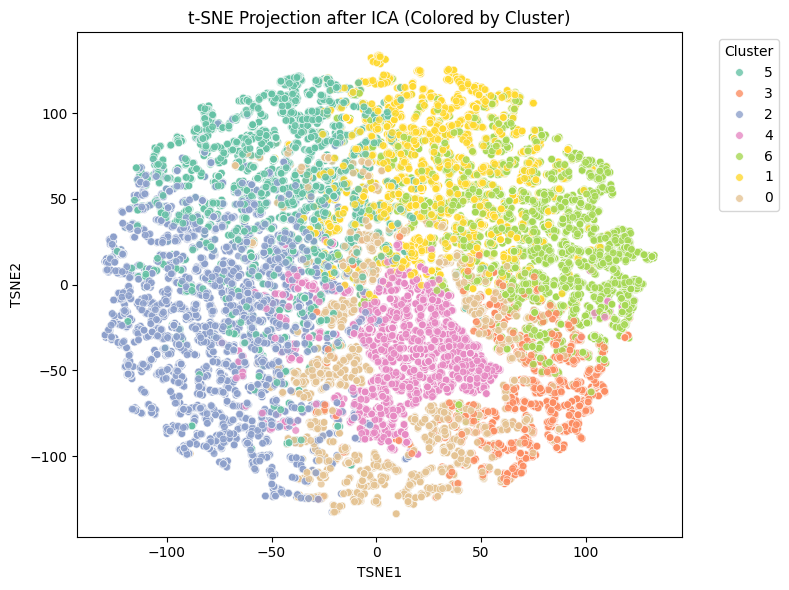

In [ ]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ICAの結果（3次元）に対してt-SNE（2次元）を適用
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(ica_df[['ICA1', 'ICA2', 'ICA3']])

# 結果をDataFrameにまとめる
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = ica_df['cluster']

# 可視化（Seabornでクラスタごとに色分け）
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=tsne_df,
    x='TSNE1', y='TSNE2',
    hue='cluster',
    palette='Set2',
    s=30,
    alpha=0.8
)
plt.title("t-SNE Projection after ICA (Colored by Cluster)")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 解釈 (各クラスタの中心に近い上位50件をLLMに与えて解釈させる)

In [10]:
!pip install openai

In [3]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pandas.read_pickle('/content/drive/MyDrive/生物学/分類学/意味論/くも_embedding_cluster_central.pkl')
data

,genus,species,author,year,Morphology,Ecology & Behavior,Geography,People,Modern & Past Culture,Other,embedding,label,cluster
0,Scytodes,diminuta,Valerio,1981,1,0,0,0,0,0,"[0.005261344835162163, -0.0022990750148892403,...",Morphology,0
1,Grammostola,diminuta,"Ferretti, Pompozzi, González & Pérez-Miles",2013,1,0,0,0,0,0,"[0.005261344835162163, -0.0022990750148892403,...",Morphology,0
2,Otacilia,curvata,"Jin, Fu, Yin & Zhang",2016,1,0,0,0,0,0,"[0.0037042780313640833, 0.013345909304916859, ...",Morphology,0
3,Pimoa,curvata,Chamberlin & Ivie,1943,1,0,0,0,0,0,"[0.003696128726005554, 0.013297172263264656, -...",Morphology,0
4,Bifurcia,curvata,Sha & Zhu,1987,1,0,0,0,0,0,"[0.0036616898141801357, 0.01330494787544012, -...",Morphology,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,Rhitymna,tangi,Quan & Liu,2012,0,0,0,1,0,0,"[-0.008269079029560089, -0.05036769434809685, ...",People,6
346,Glenognatha,tangi,"Zhu, Song & Zhang",2003,0,0,0,1,0,0,"[-0.008269079029560089, -0.05036769434809685, ...",People,6
347,Synagelides,tangi,"Liu, Chen, Xu & Peng",2017,0,0,0,1,0,0,"[-0.008269079029560089, -0.05036769434809685, ...",People,6
348,Clubiona,tangi,"Liu, Peng & Yan",2016,0,0,0,1,0,0,"[-0.008269079029560089, -0.05036769434809685, ...",People,6


speciesに重複が多いので、重複削除

In [8]:
#speciesの重複削除
data = data.drop_duplicates(subset=['species'])
data

,genus,species,author,year,Morphology,Ecology & Behavior,Geography,People,Modern & Past Culture,Other,embedding,label,cluster
0,Scytodes,diminuta,Valerio,1981,1,0,0,0,0,0,"[0.005261344835162163, -0.0022990750148892403,...",Morphology,0
2,Otacilia,curvata,"Jin, Fu, Yin & Zhang",2016,1,0,0,0,0,0,"[0.0037042780313640833, 0.013345909304916859, ...",Morphology,0
7,Cambalida,unica,Haddad,2012,0,0,0,0,0,1,"[0.008802130818367004, -0.006257240194827318, ...",Other,0
8,Makora,figurata,Forster & Wilton,1973,1,0,0,0,0,0,"[0.008490228094160557, -0.011542052961885929, ...",Morphology,0
10,Schizocosa,tenera,Karsch,1879,1,0,0,0,0,0,"[-0.016084201633930206, -0.022734086960554123,...",Morphology,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Agelena,chayu,"Zhang, Zhu & Song",2005,0,0,1,0,0,0,"[-0.008449414744973183, -0.006244837772101164,...",Geography,6
336,Selenops,baweka,Crews,2011,0,0,1,0,1,0,"[0.001513213966973126, -0.009536228142678738, ...",Geography,6
337,Nesticella,taurama,Lehtinen & Saaristo,1980,0,0,1,0,0,0,"[0.0029827305115759373, -0.044152289628982544,...",Geography,6
338,Pseudocorinna,juakalyi,Jocqué & Bosselaers,2011,0,0,0,1,0,0,"[-0.0013394460547715425, -0.007274389732629061...",People,6


In [15]:
import openai
import pandas as pd

# OpenAIのAPIキーを設定
openai.api_key = "ーーー"

# クラスタごとのspeciesを取得する関数
def get_species_by_cluster(df, cluster_id, top_n=50):
    return df[df['cluster'] == cluster_id]['species'].drop_duplicates().head(top_n).tolist()

# プロンプト生成関数（ここだけを編集すればOK）
def build_prompt(cluster_id, species_list):
    species_text = ', '.join(species_list)
    prompt = (
        f"あなたは生物の分類に詳しい専門家です。\n\n"
        f"以下はクラスタ {cluster_id} に含まれる代表的な生物のリストです：\n\n"
        f"{species_text}\n\n"
        f"このリストに基づいて、どのようなカテゴリや共通点によってこのクラスタが形成されていると考えられるか、"
        f"推論ステップを含めて論理的に説明してください。\n\n"
        f"その上で、最も可能性の高いカテゴリの候補を3つ、理由とともに順位付きで箇条書きで挙げてください。\n\n"
        f"形式例：\n"
        f"1位：推論カテゴリ（理由）\n"
        f"2位：推論カテゴリ（理由）\n"
        f"3位：推論カテゴリ（理由）"
    )
    return prompt

# LLMに問い合わせる関数
def query_openai(prompt, model="gpt-4.1-mini-2025-04-14"):
    response = openai.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": "あなたは分類学の専門家です。"},
            {"role": "user", "content": prompt}
        ],
        temperature=0,
        max_tokens=2000
    )
    return response.choices[0].message.content

# 全クラスタに対して処理を行う
def analyze_all_clusters(df, cluster_ids):
    results = {}
    for cluster_id in cluster_ids:
        species_list = get_species_by_cluster(df, cluster_id)
        prompt = build_prompt(cluster_id, species_list)
        print(f"\n[Cluster {cluster_id} Prompt]")
        print(prompt)  # 確認用
        result = query_openai(prompt)
        print(f"\n[Cluster {cluster_id} Interpretation]")
        print(result)
        results[cluster_id] = result
    return results

# 例: DataFrameが `data` として定義済み
# cluster列とspecies列が含まれていることが前提
cluster_ids = sorted(data['cluster'].unique())
results = analyze_all_clusters(data, cluster_ids)



[Cluster 0 Prompt]
あなたは生物の分類に詳しい専門家です。

以下はクラスタ 0 に含まれる代表的な生物のリストです：

diminuta, curvata, unica, figurata, tenera, occulta, maculina, sulcosa, dilecta, adunca, diabolica, aulica, diversa, obliqua

このリストに基づいて、どのようなカテゴリや共通点によってこのクラスタが形成されていると考えられるか、推論ステップを含めて論理的に説明してください。

その上で、最も可能性の高いカテゴリの候補を3つ、理由とともに順位付きで箇条書きで挙げてください。

形式例：
1位：推論カテゴリ（理由）
2位：推論カテゴリ（理由）
3位：推論カテゴリ（理由）

[Cluster 0 Interpretation]
クラスタ 0 に含まれる生物名のリストを観察すると、以下の特徴が見られます。

【推論ステップ】

1. **名称の特徴分析**  
   これらの名前はすべてラテン語風の形容詞や形容詞的な語尾を持っており、種小名として使われることが多い。例えば、diminuta（小さい）、curvata（曲がった）、unica（唯一の）、figurata（形のある）、tenera（柔らかい）、occulta（隠れた）、など、形態的特徴や性質を表す形容詞が多い。

2. **生物群の推定**  
   種小名として形容詞が多用される生物群としては、昆虫、植物、菌類、軟体動物などが考えられるが、特に昆虫や軟体動物の種名に形態的特徴を表す形容詞が多い傾向がある。

3. **クラスタ形成の基準推定**  
   クラスタ0は、これらの種が共通して持つ「形態的特徴を表す形容詞的種小名を持つ」という点でまとめられている可能性が高い。つまり、分類学的には「形態的特徴に基づく種のグルーピング」や「形容詞的種小名を持つ種の集合」と考えられる。

4. **他の可能性の検討**  
   - 生息環境や生態的特徴での分類は名前からは推測困難。  
   - 系統的分類（科や属）での共通点は名前だけでは判断できない。  
   - 形態的特徴を表す種小名の集合という点が最も明確。

【最も可能性の高いカテゴリ候補】

1